<a href="https://colab.research.google.com/github/jayanthmateti/Mini-Project/blob/main/Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install bing-image-downloader

In [ ]:
!mkdir images

In [ ]:
from bing_image_downloader import downloader
downloader.download("truck",limit=50,output_dir="images",adult_filter_off=True)

[%] Downloading Images to /content/images/truck


[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from http://smclassiccars.com/uploads/postfotos/1968-international-harvester-44-345-4sd-truck-true-barn-find-1.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://100hotcars.info/wp-content/uploads/2019/11/fiats-new-toro-sports-pickup-truck-shows-its-true-face-in-official-photo.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://monster-trucks-for-sale.com/wp-content/monster-trucks-for-sale.com/2017/05/true-head-turner-1970-international-harvester-scout-monster-truck-for-sale-2017-05-19-1.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://www.ford-trucks.com/wp-content/uploads/2017/04/TrueDetectiveF150-2.jpeg
[%] File Downloaded !

[%] Downloading Image #5 from http://www.indiewire.com/wp-content/uploads/2017/04/screen-shot-2017-04-17-at-08-34-41.png?w=780
[%] File Downloaded !

[%] Downloading Image #6 from https://c

In [ ]:
downloader.download("car",limit=50,output_dir="images",adult_filter_off=True)

[%] Downloading Images to /content/images/car


[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from http://www.carbodydesign.com/archive/2009/08/05-sv-9-competizione-images/SV-9-Competizione-4-lg.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://static.carthrottle.com/workspace/uploads/posts/2017/12/0fcad9c9368abebdbfb8aaf0211bf96b.jpg
[%] File Downloaded !

[%] Downloading Image #3 from http://jaikrishnaamaruti.com/uploads/truevalue_cars/0_27-01-2018_16-03-53.jpg
[%] File Downloaded !

[%] Downloading Image #4 from https://icdn-4.motor1.com/images/mgl/8gJ93/s1/amc-amx-the-first-true-sports-car-of-the-1960s.jpg
[%] File Downloaded !

[%] Downloading Image #5 from http://farm9.staticflickr.com/8012/7170866083_8504026441_o.jpg
[%] File Downloaded !

[%] Downloading Image #6 from http://dmi3w0goirzgw.cloudfront.net/gallery-images/1600/406000/600/406638.jpg
[%] File Downloaded !

[%] Downloading Image #7 from https://media.whatcar.com/wc-im

In [ ]:
downloader.download("auto rickshaw",limit=50,output_dir="images",adult_filter_off=True)

[%] Downloading Images to /content/images/auto rickshaw


[!!]Indexing page: 1

[%] Indexed 50 Images on Page 1.


[%] Downloading Image #1 from https://3.bp.blogspot.com/-zp9pw16lMdo/T1DWE_PCYEI/AAAAAAAAAec/CHBgIUtkKlM/s1600/India_auto_rickshaws_taxi.jpg
[%] File Downloaded !

[%] Downloading Image #2 from https://n3.sdlcdn.com/imgs/h/d/0/KidzFan-Die-Cast-Auto-Rickshaw-SDL919486418-6-2c2ae.jpeg
[%] File Downloaded !

[%] Downloading Image #3 from https://n3.sdlcdn.com/imgs/h/d/0/KidzFan-Die-Cast-Auto-Rickshaw-SDL919486418-4-b7792.jpeg
[%] File Downloaded !

[%] Downloading Image #4 from https://n1.sdlcdn.com/imgs/h/d/0/KidzFan-Die-Cast-Auto-Rickshaw-SDL919486418-3-1a0f4.jpeg
[%] File Downloaded !

[%] Downloading Image #5 from https://n1.sdlcdn.com/imgs/h/d/0/KidzFan-Die-Cast-Auto-Rickshaw-SDL919486418-1-48543.jpeg
[%] File Downloaded !

[%] Downloading Image #6 from https://e4p7c9i3.stackpathcdn.com/wp-content/uploads/2016/06/12-990x864.jpg?iv=64
[%] File Downloaded !

[%] Downloadin

In [ ]:
import os 
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize

target=[]
images=[]
flat_data=[]

datadir='/content/images'
categories=['truck','car','auto rickshaw']

for category in categories:
  class_num=categories.index(category)
  path=os.path.join(datadir,category)
  for img in os.listdir(path):
    img_array=imread(os.path.join(path,img))
    img_resized=resize(img_array,(150,150,3))
    flat_data.append(img_resized.flatten())
    images.append(img_resized)
    target.append(class_num)

flat_data=np.array(flat_data)
target=np.array(target)
images=np.array(images)

<BarContainer object of 3 artists>

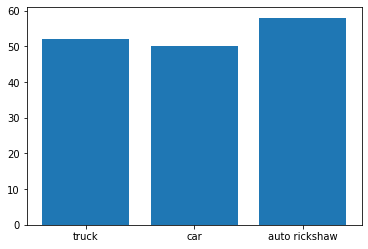

In [ ]:
unique,count=np.unique(target,return_counts=True)
plt.bar(categories,count)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(flat_data,target,test_size=0.5,random_state=125) 

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
param_grid=[
            {'C':[1,10,100,1000],'kernel':['linear']},
            {'C':[1,10,100,1000],'gamma':[0.001,0.0001],'kernel':['rbf']},
]

svc=svm.SVC(probability=True)
clf=GridSearchCV(svc,param_grid)
clf.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=True, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
y_pred=clf.predict(x_test)
y_pred

array([0, 1, 0, 0, 1, 0, 1, 2, 1, 0, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0, 2,
       1, 1, 1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 2, 2, 0, 0, 2, 0, 2, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 2, 0, 2, 0, 0, 1, 2, 1, 0, 1, 0, 1, 2, 1,
       1, 2, 0, 1, 1, 1, 0, 2, 1, 1, 2, 0, 2, 0])

In [ ]:
y_test

array([2, 1, 1, 2, 1, 0, 0, 2, 1, 2, 2, 1, 0, 0, 1, 1, 2, 0, 2, 1, 1, 2,
       1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 2, 0, 0, 2, 1, 0, 2, 0, 2, 2, 1, 1,
       0, 2, 0, 0, 0, 1, 0, 1, 2, 0, 0, 1, 0, 0, 2, 1, 2, 2, 2, 1, 2, 1,
       2, 2, 2, 0, 1, 2, 0, 2, 1, 2, 2, 1, 2, 0])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_pred,y_test)

0.6

In [ ]:
confusion_matrix(y_pred,y_test)

array([[20, 11,  8],
       [ 5, 13,  6],
       [ 2,  0, 15]])

In [ ]:
import pickle
pickle.dump(clf,open('img_model.p','wb'))

In [ ]:
model=pickle.load(open('img_model.p','rb'))

In [ ]:
flat_data=[]
url=input('enter your URL:')
img=imread(url)
img_resized=resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data=np.array(flat_data)
print(img.shape)
y_out=model.predict(flat_data)
y_out=categories[y_out[0]]
print(f'predicted output:{y_out}')

enter your URL:https://sc01.alicdn.com/kf/HTB1GA78dIic_eJjSZFnq6xVwVXa8/202607596/HTB1GA78dIic_eJjSZFnq6xVwVXa8.jpg
(862, 1460, 3)
predicted output:truck


In [3]:
!pip install streamlit

!pip install pyngrok
from pyngrok import ngrok as ngrok

In [4]:
%%writefile app.py
import streamlit as st
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
st.title('Image Classifier')
st.text('Upload Image')

model=pickle.load(open('img_model.p','rb'))

uploaded_file=st.file_uploader("Choose an Image...", type='jpg')
if uploaded_file is not None:
  img=Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    categories=['truck','car','auto rickshaw']
    st.write('Result...')
    flat_data=[]
    img=np.array(img)
    img_resized=resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data=np.array(flat_data)
    y_out=model.predict(flat_data)
    y_out=categories[y_out[0]]
    st.title(f'predicted output:{y_out}')



Overwriting app.py


In [5]:
!nohup streamlit run app.py &
demo_url=ngrok.connect('8501')
demo_url


nohup: appending output to 'nohup.out'


<NgrokTunnel: "http://fa3f1bc2246f.ngrok.io" -> "http://localhost:8501">